In [716]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import scipy as sc
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")
from pandasql import sqldf 
from scipy.stats import chi2
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

#### Reading CSV Files into Dataframe

In [717]:
transactions_df=pd.read_csv("transactions.csv")
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [718]:
store_df=pd.read_csv("stores.csv")
store_df.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [719]:
holidays_df=pd.read_csv("holidays_events.csv")
holidays_df =holidays_df[holidays_df['transferred']==False]
holidays_df['date'] = pd.to_datetime(holidays_df['date'])
holidays_df.dtypes

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object

In [720]:
oil_df=pd.read_csv("oil.csv")
oil_df['date'] = pd.to_datetime(oil_df['date'])
oil_df.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [721]:
train_df=pd.read_csv("train.csv")
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [722]:
test_df=pd.read_csv("test.csv")
test_df['date'] = pd.to_datetime(test_df['date'])

#### Checking the shape, data types and initail summary  of columns

In [723]:
print(transactions_df.shape,"\n")
transactions_df['store_nbr']=transactions_df['store_nbr'].astype('object')
print(transactions_df.info(),'\n')
print(transactions_df.describe(),'\n')

(83488, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  object        
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ MB
None 

       transactions
count  83488.000000
mean    1694.602158
std      963.286644
min        5.000000
25%     1046.000000
50%     1393.000000
75%     2079.000000
max     8359.000000 



In [724]:
print(store_df.shape,"\n")
store_df['store_nbr']=store_df['store_nbr'].astype('object')
store_df['cluster']=store_df['cluster'].astype('object')
print(store_df.info(),'\n')
print(store_df.describe(),'\n')

(54, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     object
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB
None 

        store_nbr   city      state type  cluster
count          54     54         54   54       54
unique         54     22         16    5       17
top             1  Quito  Pichincha    D        3
freq            1     18         19   18        7 



In [725]:
print(holidays_df.shape,"\n")
holidays_df['date'] = pd.to_datetime(holidays_df['date'])
print(holidays_df.info(),'\n')
print(holidays_df.describe(),'\n')

(338, 6) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         338 non-null    datetime64[ns]
 1   type         338 non-null    object        
 2   locale       338 non-null    object        
 3   locale_name  338 non-null    object        
 4   description  338 non-null    object        
 5   transferred  338 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 16.2+ KB
None 

                       date     type    locale locale_name description  \
count                   338      338       338         338         338   
unique                  300        6         3          24         103   
top     2014-06-25 00:00:00  Holiday  National     Ecuador    Carnaval   
freq                      4      209       166         166          10   
first   2012-03-02 00:00:00      NaN       NaN 

In [726]:
print(oil_df.shape,"\n")
oil_df['date'] = pd.to_datetime(oil_df['date'])
print(oil_df.info(),'\n')
print(oil_df.describe(),'\n')

(1218, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB
None 

        dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000 



In [727]:
print(train_df.shape,"\n")
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['store_nbr']=train_df['store_nbr'].astype('object')
print(train_df.info(),'\n')
print(train_df.describe(),'\n')

(3000888, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    object        
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 137.4+ MB
None 

                 id         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  3.577757e+02  2.602770e+00
std    8.662819e+05  1.101998e+03  1.221888e+01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  0.000000e+00  0.000000e+00
50%    1.500444e+06  1.100000e+01  0.000000e+00
75%    2.250665e+06  1.958473e+02  0.000000e+00
max    3.000887e+06  1.247170e+05  7.410000e+02 



## Understanding Tables/Dataframe

#### Checking the nulls and duplicates in the data

In [728]:
print("Finding if any Nulls exist in dataset -- \n")
print("For Transactions_df \n",transactions_df.isna().sum())
print("\nFor Holidays_df \n",holidays_df.isna().sum())
print("\nFor Oil_df \n",oil_df.isna().sum())
print("\nFor Store_df \n",store_df.isna().sum())
print("\nFor Train_df \n",train_df.isna().sum())

Finding if any Nulls exist in dataset -- 

For Transactions_df 
 date            0
store_nbr       0
transactions    0
dtype: int64

For Holidays_df 
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

For Oil_df 
 date           0
dcoilwtico    43
dtype: int64

For Store_df 
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

For Train_df 
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


As seen above, our data has No missing values in 4 of the 5 tables.. In oil_df, we have 43 records which are null

#### Replacing Nulls in " oil_df" with 0

In [729]:
oil_df.fillna(method='bfill',inplace=True)

In [730]:
print("Finding if any duplicates exist in dataset -- \n")
print("For Transactions_df \n",transactions_df.duplicated().sum())
print("\nFor Holidays_df \n",holidays_df.duplicated().sum())
print("\nFor Oil_df \n",oil_df.duplicated().sum())
print("\nFor Store_df \n",store_df.duplicated().sum())
print("\nFor Train_df \n",train_df.duplicated().sum())


Finding if any duplicates exist in dataset -- 

For Transactions_df 
 0

For Holidays_df 
 0

For Oil_df 
 0

For Store_df 
 0

For Train_df 
 0


As seen, there are no duplicates in the 5 dataframes

#### Checking the level of the dataframes

In [731]:
trans_q= 'SELECT date, store_nbr FROM transactions_df group by date,store_nbr having count(*)>1 '
sqldf(trans_q, globals())

,date,store_nbr


In [732]:
holidays_q= 'SELECT date FROM holidays_df group by date  having count(*)>1 '
sqldf(holidays_q, globals())

,date
0,2012-06-25 00:00:00.000000
1,2012-07-03 00:00:00.000000
2,2012-12-22 00:00:00.000000
3,2012-12-24 00:00:00.000000
4,2012-12-31 00:00:00.000000
5,2013-05-12 00:00:00.000000
6,2013-06-25 00:00:00.000000
7,2013-07-03 00:00:00.000000
8,2013-12-22 00:00:00.000000
9,2014-06-25 00:00:00.000000


In [733]:
oil_q= 'SELECT date FROM oil_df group by date having count(*)>1 '
sqldf(oil_q, globals())

,date


In [734]:
store_q= 'SELECT store_nbr FROM store_df group by store_nbr  having count(*)>1 '
sqldf(store_q, globals())

,store_nbr


In [735]:
train_q= 'SELECT date,store_nbr,family FROM train_df group by date,store_nbr,family having count(*)>1 '
sqldf(train_q, globals())

,date,store_nbr,family


### Univariate Analysis

#### Transaction_Dataframe

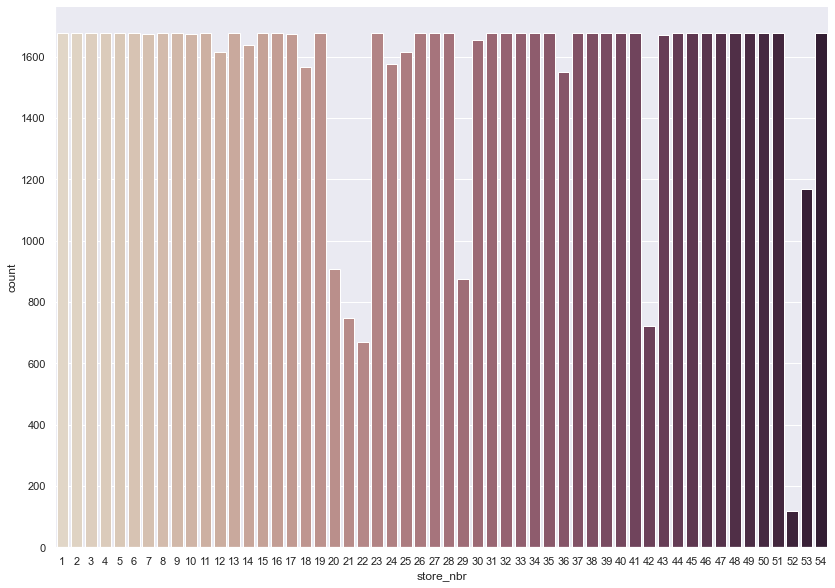

In [736]:
sns.catplot(x="store_nbr", kind="count", palette="ch:.25", data=transactions_df, height=8.27, aspect=11.7/8.27)

#### Train Dataframe

Almost all the stores has occures same number of times in transaction_df

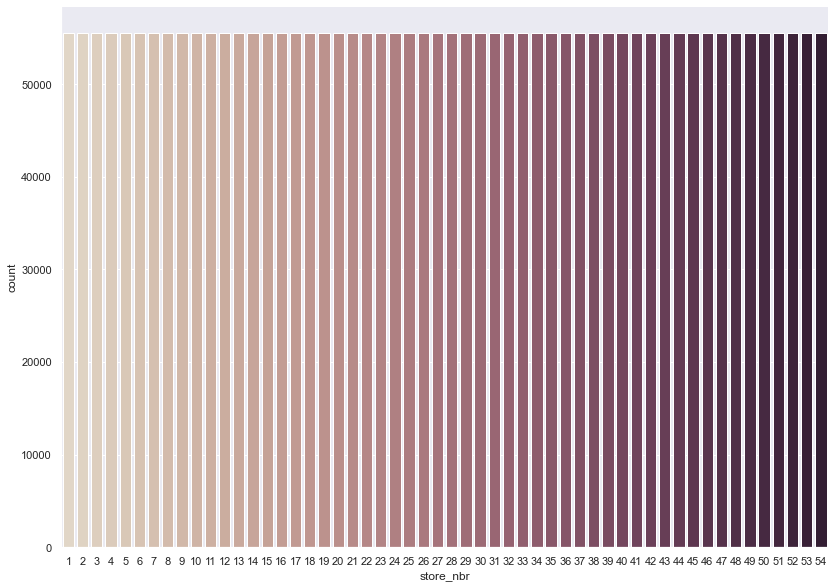

In [737]:
sns.catplot(x="store_nbr", kind="count", palette="ch:.25", data=train_df, height=8.27, aspect=11.7/8.27)

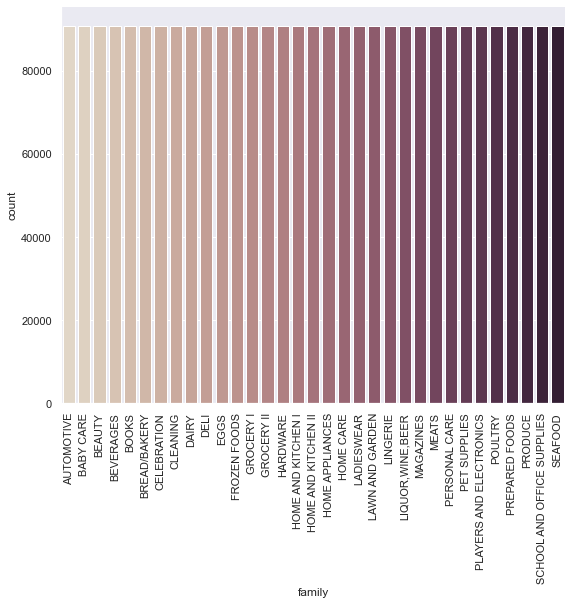

In [738]:
sns.catplot(x="family", kind="count", palette="ch:.25", data=train_df, height=6.27, aspect=11.7/8.27)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:ylabel='onpromotion'>

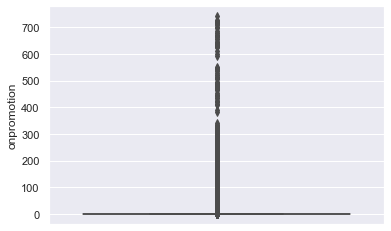

In [739]:
sns.boxplot(y=train_df["onpromotion"])

<AxesSubplot:ylabel='sales'>

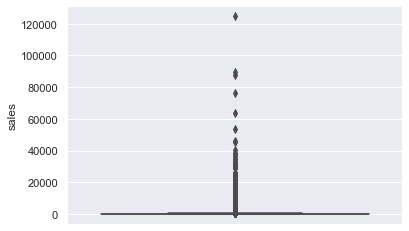

In [740]:
sns.boxplot(y=train_df["sales"])

Almost all the stores has occures same number of times in train_df

#### Holidays Dataframe

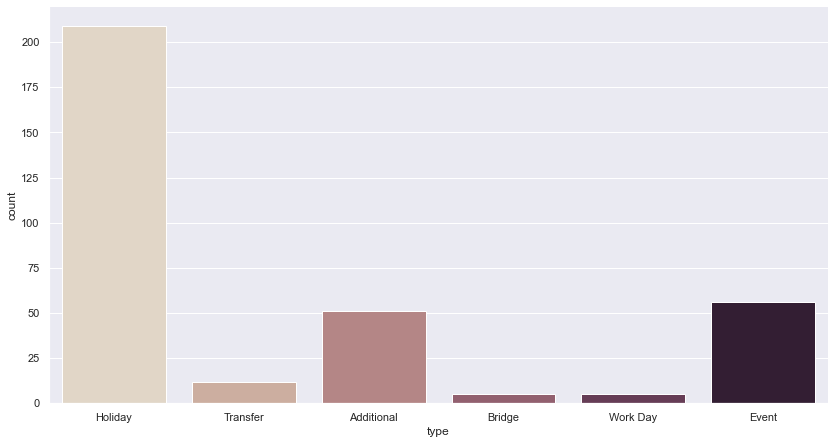

In [741]:
sns.catplot(x="type", kind="count", palette="ch:.25", data=holidays_df, height=6.27, aspect=11.7/6.27)

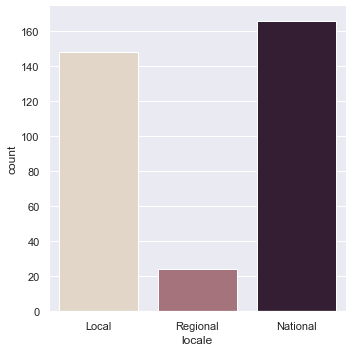

In [742]:
sns.catplot(x="locale", kind="count", palette="ch:.25", data=holidays_df)

Interpretation - There are more number of National Holidays than Local or Regional

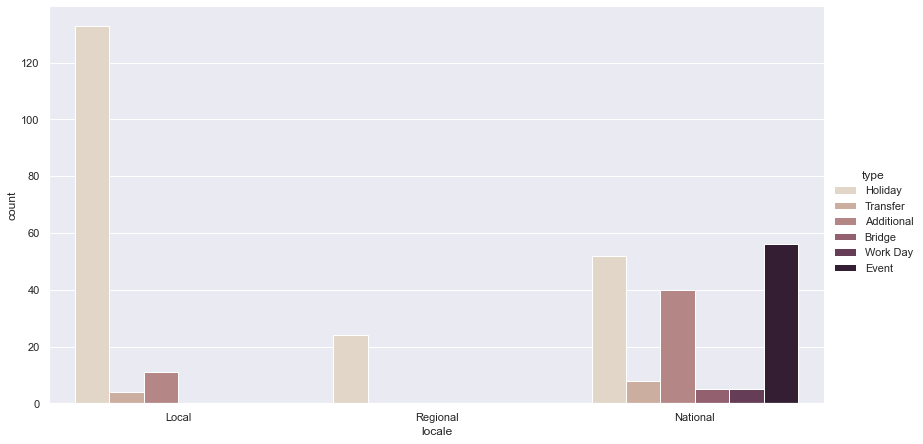

In [743]:
sns.catplot(x="locale", kind="count",hue='type' ,palette="ch:.25", data=holidays_df, height=6.27, aspect=11.7/6.27)

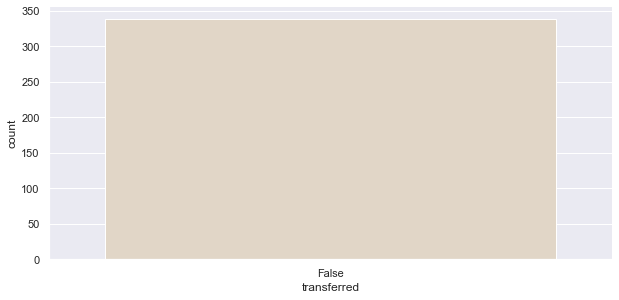

In [744]:
sns.catplot(x="transferred", kind="count" ,palette="ch:.25", data=holidays_df, height=4.27, aspect=8.7/4.27)

Interpretation: Scenario of a holiday_event getting transferred to another day is very low

#### Stores Dataframe

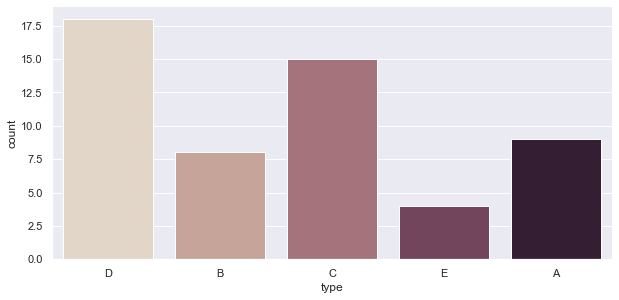

In [745]:
sns.catplot(x="type", kind="count" ,palette="ch:.25", data=store_df, height=4.27, aspect=8.7/4.27)

There are more number of stores of Type D and Type C

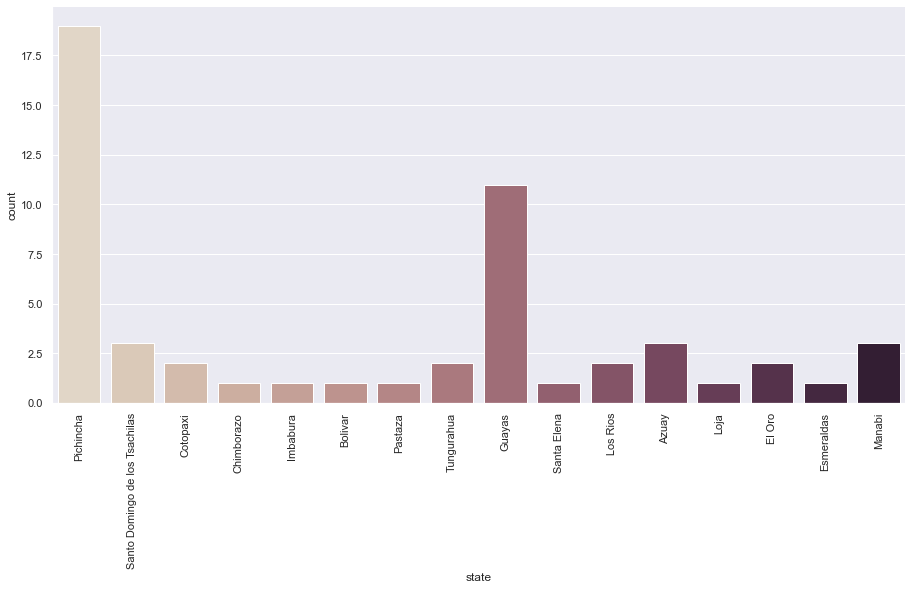

In [746]:
sns.catplot(x="state", kind="count" ,palette="ch:.25", data=store_df, height=6.27, aspect=8.7/4.27)
plt.xticks(rotation = 90)
plt.show()

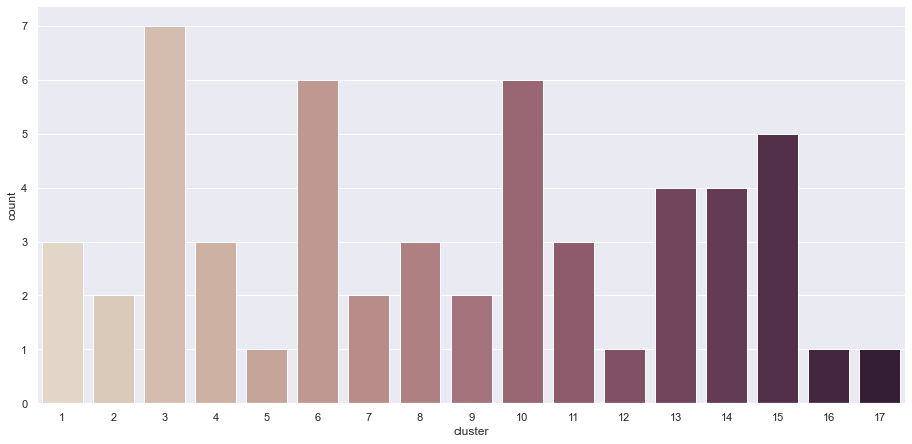

In [747]:
sns.catplot(x="cluster", kind="count" ,palette="ch:.25", data=store_df, height=6.27, aspect=8.7/4.27)
plt.show()

#### Oil Dataframe

<AxesSubplot:ylabel='dcoilwtico'>

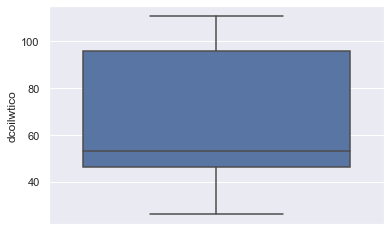

In [748]:
sns.boxplot(y=oil_df["dcoilwtico"])

### Creating a final dataset by joining all the tables


In [749]:
holidays_q= 'SELECT * FROM (select *, rank() over(partition by date order by description desc) as rank from holidays_df ) where rank==1'
holidays_updated_df=sqldf(holidays_q, globals())
holidays_updated_df['date']=pd.to_datetime(holidays_updated_df['date'])
holidays_updated_df=holidays_updated_df[['date','type','locale','locale_name']]

In [750]:
train_df1=train_df.merge(store_df, on='store_nbr', how='left')
train_df1.rename(columns={'type':'store_type'}, inplace=True)

train_df2=train_df1.merge(oil_df,on='date', how='left')

train_df3=train_df2.merge(transactions_df,on=['date','store_nbr'], how='left')

train_df4=train_df3.merge(holidays_updated_df,on=['date'], how='left')

train_df4.rename(columns={'type':'holiday_type'}, inplace=True)

In [751]:
train_df4['dcoilwtico'].fillna(method='bfill',inplace=True)

In [752]:
train_df4.loc[train_df4['transactions'].isna(),'transactions']=0

In [753]:
train_df4.loc[train_df4['holiday_type'].isna(),'holiday_type']='0'
train_df4.loc[train_df4['holiday_type']!='0','holiday_type']='1'

In [754]:
train_df4.loc[train_df4['locale'].isna(),'locale']='Not Applicable'
train_df4.loc[train_df4['locale_name'].isna(),'locale_name']='Not Applicable'

In [755]:
train_df4['Month'] = train_df4['date'].dt.month_name()
train_df4['Year'] =  pd.DatetimeIndex(train_df4['date']).year
train_df4['Month_Number'] =  pd.DatetimeIndex(train_df4['date']).month
train_df4['weekday_nbr']=train_df4['date'].dt.dayofweek
train_df4['weekday']=train_df4['date'].dt.day_name()
train_df4['Monthly_Level']=train_df4['date'].dt.to_period('M')

In [756]:
train_df4.isna().sum()

id               0
date             0
store_nbr        0
family           0
sales            0
onpromotion      0
city             0
state            0
store_type       0
cluster          0
dcoilwtico       0
transactions     0
holiday_type     0
locale           0
locale_name      0
Month            0
Year             0
Month_Number     0
weekday_nbr      0
weekday          0
Monthly_Level    0
dtype: int64

In [757]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 21 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int64         
 1   date           datetime64[ns]
 2   store_nbr      object        
 3   family         object        
 4   sales          float64       
 5   onpromotion    int64         
 6   city           object        
 7   state          object        
 8   store_type     object        
 9   cluster        object        
 10  dcoilwtico     float64       
 11  transactions   float64       
 12  holiday_type   object        
 13  locale         object        
 14  locale_name    object        
 15  Month          object        
 16  Year           int64         
 17  Month_Number   int64         
 18  weekday_nbr    int64         
 19  weekday        object        
 20  Monthly_Level  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(5), object(11), period[M](1)
memory u

In [758]:
train=train_df4[train_df4['date']<'2017-01-01']
test=train_df4[train_df4['date']>='2017-01-01']

#### Checking for association between all categorical values

In [759]:
train_columns_df=train_df4.select_dtypes(include=['category','object'])
train_columns=list(train_columns_df.columns)
train_columns=train_columns[:9]

In [760]:
No_relationship_pair=list()
relationship_pair=list()
for i in range(len(train_columns)):
    for j in range(i+1,len(train_columns)):
        print("Doing Chi-Square Test to check the depency between", train_columns[i] +" & " ,train_columns[j],"\n")
        print(" H0: There is no relationship between {} and {} ".format(train_columns[i],train_columns[j]))
        print(" H1: There is a relationship between {} and {} l".format(train_columns[i],train_columns[j]))

        data1=train_df4[train_columns[i] ]
        data2=train_df4[train_columns[j]]
        column_list=[train_columns[i],train_columns[j]]
        contingency_table=pd.crosstab(index=data1,columns=data2)

        Observed_Values = contingency_table.values 

        b=stats.chi2_contingency(contingency_table)
        Expected_Values = b[3]
        no_of_rows=len(contingency_table.iloc[0:2,0])
        no_of_columns=len(contingency_table.iloc[0,0:2])
        ddof=(no_of_rows-1)*(no_of_columns-1)
        print("Degree of Freedom:-",ddof)
        alpha = 0.05

        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]
        print("chi-square statistic:-",chi_square_statistic)
        critical_value=chi2.ppf(q=1-alpha,df=ddof)
        print('critical_value:',critical_value)
#p-value
        p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        print('p-value:',p_value)
        print('Significance level: ',alpha)
        print('Degree of Freedom: ',ddof)
        print('chi-square statistic:',chi_square_statistic)
        print('critical_value:',critical_value)
        if chi_square_statistic>=critical_value:
            print("Reject H0,There is evidences of relationship between 2 categorical variables")
        else:
            print("Fail to Reject H0,There is no evidences of relationship between 2 categorical variables")
    
        if p_value<=alpha:
            print("Reject H0,There is evidences of relationship between 2 categorical variables")
        else:
            print("Fail to Reject H0,There is no evidences of relationship between 2 categorical variables")
        print("\n=========================================================================\n")
        

Doing Chi-Square Test to check the depency between store_nbr &  family 

 H0: There is no relationship between store_nbr and family 
 H1: There is a relationship between store_nbr and family l
Degree of Freedom:- 1
chi-square statistic:- 0.0
critical_value: 3.841458820694124
p-value: 1.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.0
critical_value: 3.841458820694124
Fail to Reject H0,There is no evidences of relationship between 2 categorical variables
Fail to Reject H0,There is no evidences of relationship between 2 categorical variables


Doing Chi-Square Test to check the depency between store_nbr &  city 

 H0: There is no relationship between store_nbr and city 
 H1: There is a relationship between store_nbr and city l
Degree of Freedom:- 1
chi-square statistic:- 5835059.999999998
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 5835059.999999998
critical_value: 3.841458820694124
Reject

Observations:  
    a) Family of Products being sold doesnt depend upon the Store Number/Location/City/State    
    b) Store Number and Store Type are co-related   
    c) Holidays doesnt affect a particular type of store more or less  
    d) No relationship exist between type of products being sold and holiday  
    e) No relation exists between city/state and holiday   
    f) There is  relationship between store_type and cluster  

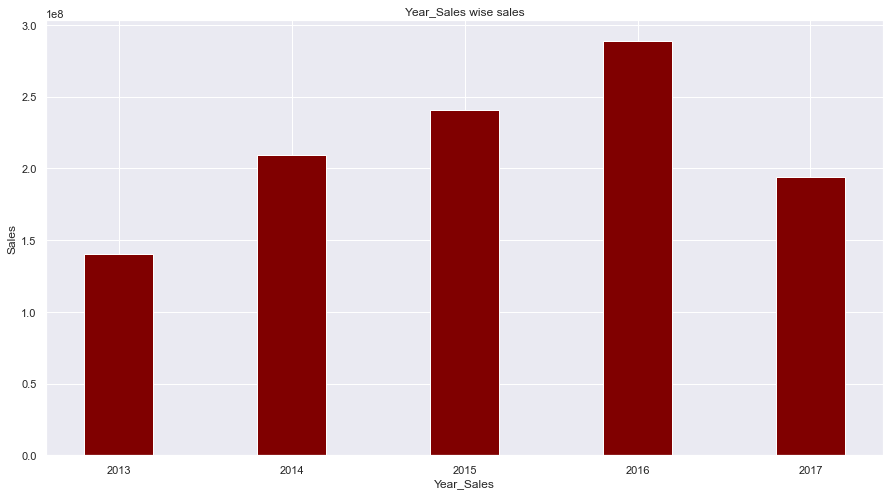

In [815]:
Year_Sales=train_df4.groupby(['Year']).agg({'sales':'sum'}).reset_index(drop=False)
plt.bar(Year_Sales['Year'], Year_Sales['sales'], color ='maroon',
        width = 0.4)

plt.xlabel("Year_Sales")
plt.ylabel("Sales")
plt.title("Year_Sales wise sales")
plt.show()

<AxesSubplot:xlabel='Month', ylabel='sales'>

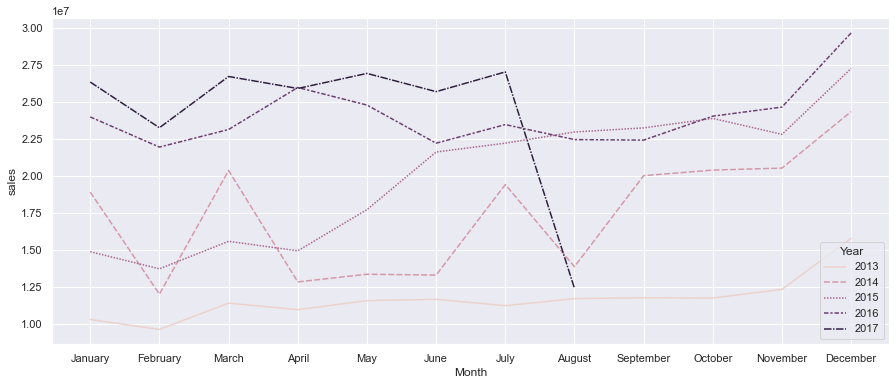

In [761]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,6)})
Sales_monthyear=train_df4.groupby(['Year','Month','Month_Number']).agg({'sales':sum}).reset_index(drop=False).sort_values(by=['Year','Month_Number'])
sns.lineplot(data=Sales_monthyear, x="Month", y="sales", hue='Year',style="Year", sort=True)

<AxesSubplot:xlabel='Month', ylabel='sales'>

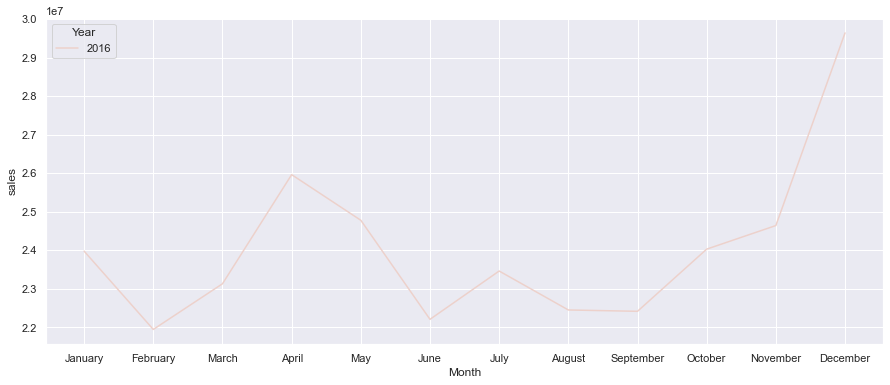

In [762]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,6)})
Sales_monthyear_2016=train_df4[train_df4['Year']==2016].groupby(['Year','Month','Month_Number']).agg({'sales':sum}).reset_index(drop=False).sort_values(by=['Year','Month_Number'])
sns.lineplot(data=Sales_monthyear_2016, x="Month", y="sales", hue='Year',style="Year", sort=True)

Observations:   
a) Out of all five years, 2016 has the highest sales.           
b) Further, we looked at monthly sales across all the 5 years to check if all the year has the same trend across the month          
c) We found that there is uncommon spike in sales in the month of April for the year of 2016. As it has been mentioned that an earthquake happened, this could be a reason for the spike of sales      


### Hypothesis Testing

#### Hypothesis 1
H0- Store has no effect on sales   
H1- Store has an effect on sales

In [763]:
store_Sales=train_df4.groupby(['store_nbr']).agg({'sales':sum}).reset_index(drop=False)

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

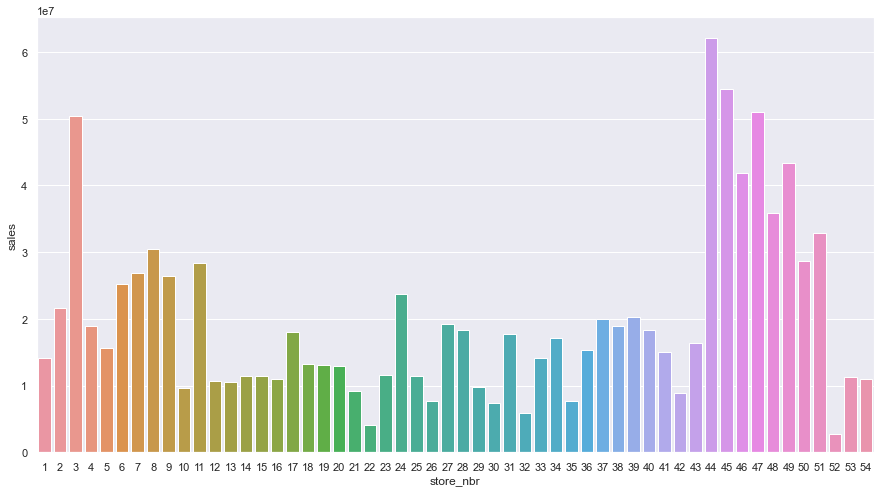

In [764]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=store_Sales, x="store_nbr", y="sales")

Observation:     
a) All the stores have pretty much similar sales except Store- 3,44,45,46,47,48,49,50,51. Lets look deeper into that

In [765]:
sales_store_44_51=train_df4[train_df4['store_nbr'].isin ([3,44,45,46,47,48,49,50,51])]

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

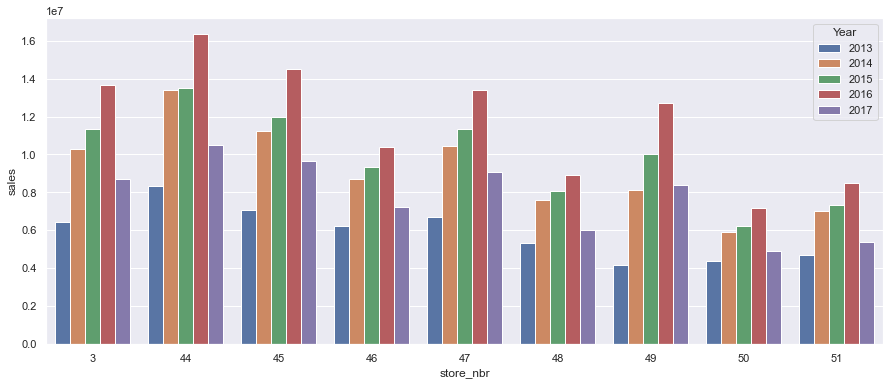

In [766]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,6)})
Sales_storeyear=sales_store_44_51.groupby(['store_nbr','Year']).agg({'sales':sum}).reset_index(drop=False).sort_values(by=['store_nbr','Year'])
sns.barplot(data=Sales_storeyear, x="store_nbr", y="sales", hue='Year')

Observation:     
a) These stores have a spike in sales in the year of 2016 approximately by 25% in most of the stores; one of the main reason could be the earthquake in 
  April 2016. Lets see if that is the case.

<AxesSubplot:xlabel='Month', ylabel='sales'>

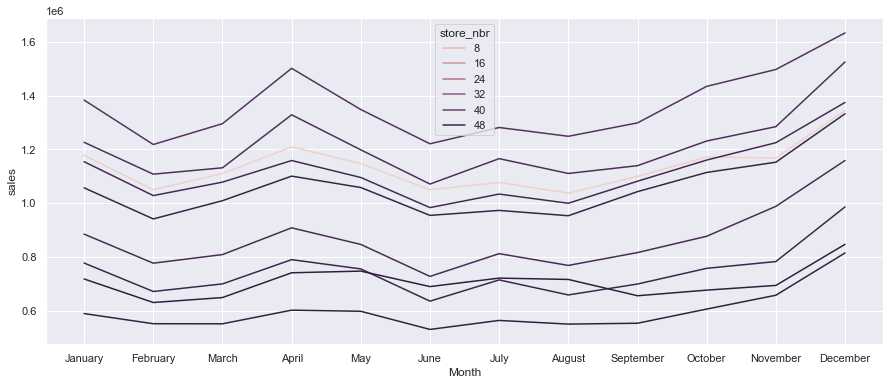

In [767]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,6)})
Sales_storemonth=sales_store_44_51[sales_store_44_51['Year']==2016].groupby(['store_nbr','Month','Month_Number']).agg({'sales':sum}).reset_index(drop=False).sort_values(by=['store_nbr','Month_Number'])
sns.lineplot(data=Sales_storemonth, x="Month", y="sales", hue='store_nbr', sort=True)

In [768]:
# Ordinary Least Squares (OLS) model
model = ols('sales ~ store_nbr', data=train_df4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
store_nbr,1.685856e+11,53.0,2746.286055,0.0
Residual,3.475688e+12,3000834.0,NaN,NaN


As P<0.05, we can reject the Null Hypothesis; i.e. Store Number has an effect on sales

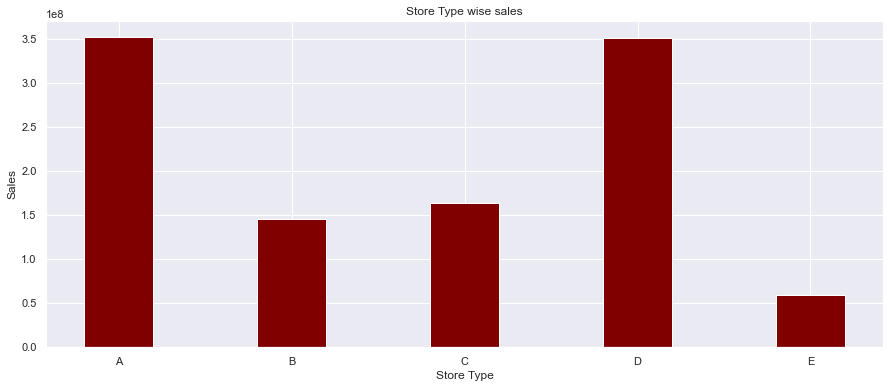

In [769]:
storetype_Sales=train_df4.groupby(['store_type']).agg({'sales':'sum','store_nbr':'nunique'}).reset_index(drop=False)
storetype_Sales['sales_per_store']=storetype_Sales['sales']/storetype_Sales['store_nbr']
# creating the bar plot
plt.bar(storetype_Sales['store_type'], storetype_Sales['sales'], color ='maroon',
        width = 0.4)

plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.title("Store Type wise sales")
plt.show()

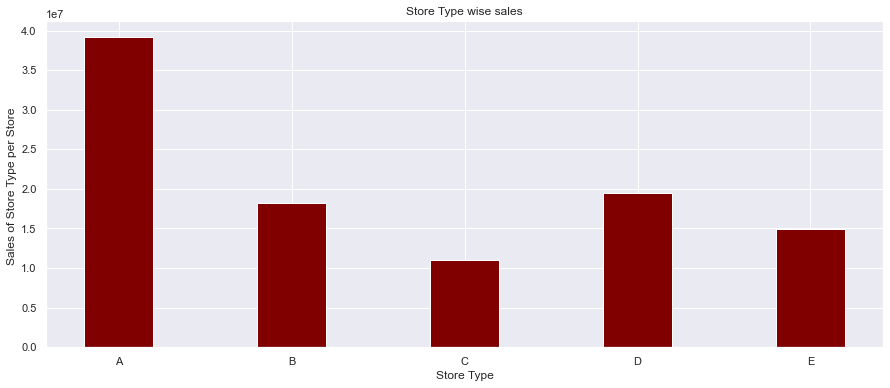

In [770]:
plt.bar(storetype_Sales['store_type'], storetype_Sales['sales_per_store'], color ='maroon',
        width = 0.4)

plt.xlabel("Store Type")
plt.ylabel("Sales of Store Type per Store ")
plt.title("Store Type wise sales")
plt.show()

<AxesSubplot:xlabel='store_type', ylabel='store_nbr'>

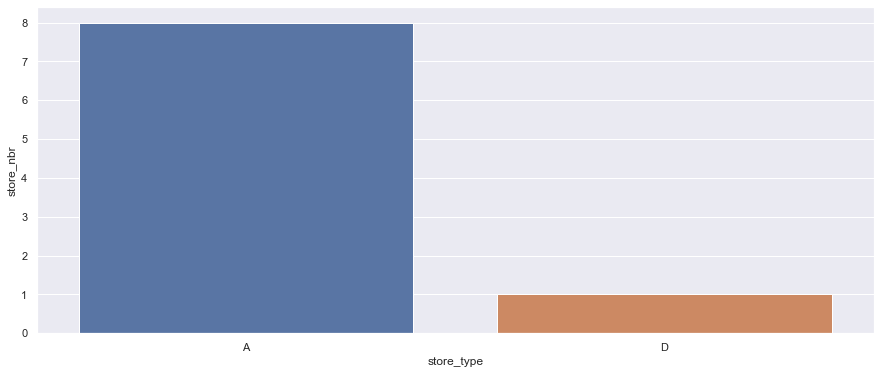

In [771]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,6)})
Sales_storetypeyear=sales_store_44_51.groupby(['store_type']).agg({'store_nbr':'nunique'}).reset_index(drop=False).sort_values(by=['store_type'])
sns.barplot(data=Sales_storetypeyear, x="store_type", y="store_nbr")

In [772]:
# Ordinary Least Squares (OLS) model
model = ols('sales ~ store_type', data=train_df4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
store_type,8.430387e+10,4.0,17766.02373,0.0
Residual,3.559970e+12,3000883.0,NaN,NaN


As P<0.05, we can reject the Null Hypothesis; i.e. Store Type  has an effect on sales

Observation:       
a) Store Type A and D has the highest overall sales among the all but if we look in detail sales per store in each store_type is highest in A. This is because total sales in Type A and D are equal but number of stores in D is far greater than A; reducing the Average sales per store        
b) Further on checking for only the  stores with top sales, we came to know that most of them falls in Store_Type='A'


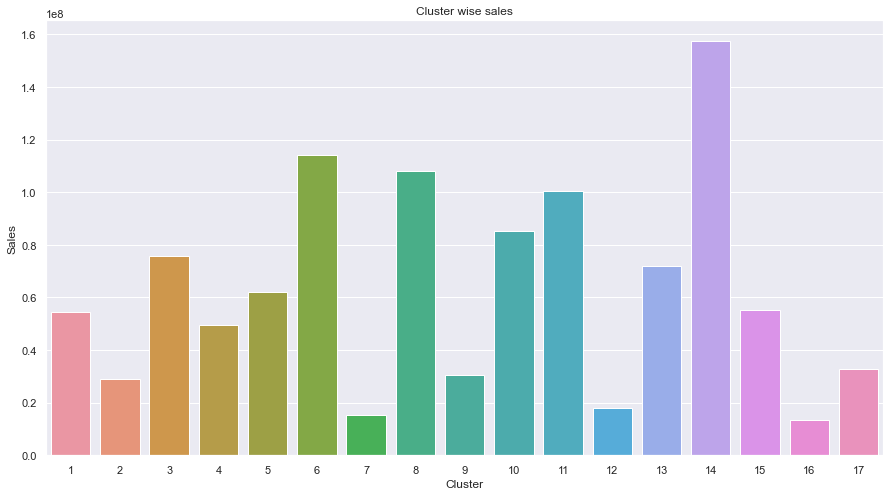

In [773]:
cluster_Sales=train_df4.groupby(['cluster']).agg({'sales':'sum', 'store_nbr':'nunique'}).reset_index(drop=False)
cluster_Sales['sales_per_store']=cluster_Sales['sales']/cluster_Sales['store_nbr']
# creating the bar plot

sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=cluster_Sales, x="cluster", y="sales")
plt.xlabel("Cluster")
plt.ylabel("Sales")
plt.title("Cluster wise sales")
plt.show()

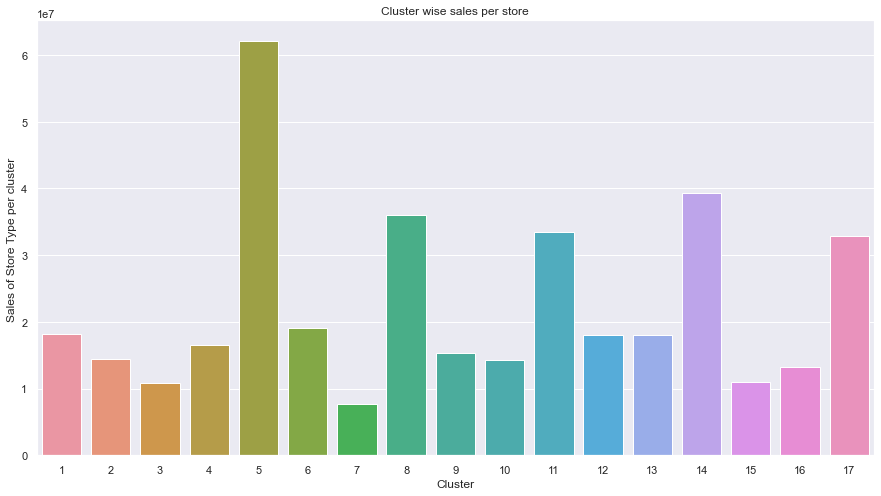

In [774]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=cluster_Sales, x="cluster", y="sales_per_store")

plt.xlabel("Cluster")
plt.ylabel("Sales of Store Type per cluster ")
plt.title("Cluster wise sales per store")
plt.show()

In [775]:
# Ordinary Least Squares (OLS) model
model = ols('sales ~ cluster', data=train_df4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
cluster,1.163983e+11,16.0,6188.150007,0.0
Residual,3.527876e+12,3000871.0,NaN,NaN


As P<0.05, we can reject the Null Hypothesis; i.e. Cluster  has an effect on sales

#### Hypothesis 2

H0: Location has no effect on sales   
H0: Location has an effect on sales

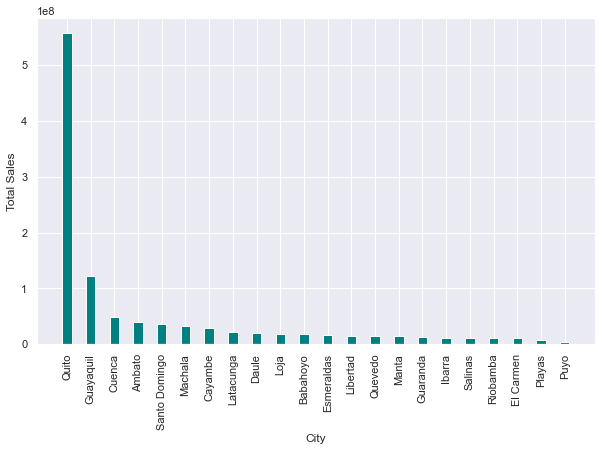

In [819]:
fig = plt.figure(figsize = (10, 6))


city_sales=train_df4.groupby(['city']).agg({'sales':'sum','store_nbr':'nunique'}).reset_index(drop=False).sort_values(by='sales', ascending=False)
city_sales['avfsales_per_store']=city_sales['sales']/city_sales['store_nbr']
plt.bar(city_sales['city'], city_sales['sales'], color ='teal',
        width = 0.4)

plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

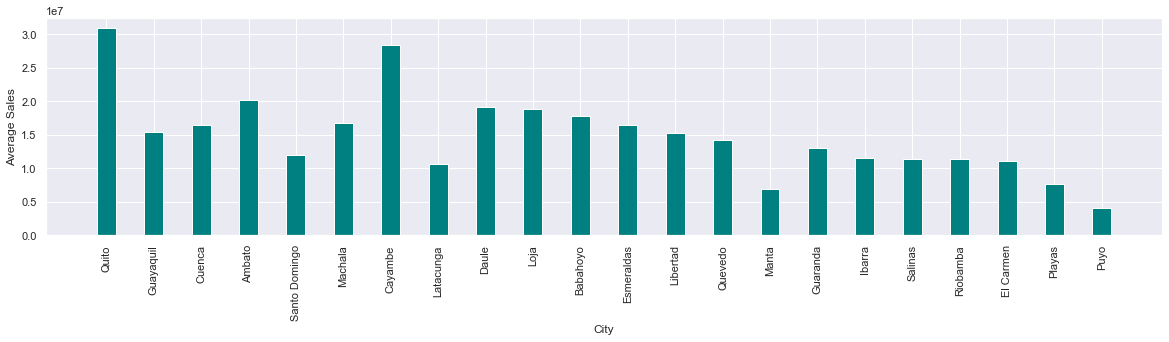

In [821]:
fig = plt.figure(figsize = (20, 4))
city_sales=train_df4.groupby(['city']).agg({'sales':'sum','store_nbr':'nunique'}).reset_index(drop=False).sort_values(by='sales', ascending=False)
city_sales['avfsales_per_store']=city_sales['sales']/city_sales['store_nbr']
plt.bar(city_sales['city'], city_sales['avfsales_per_store'], color ='teal',
        width = 0.4)

plt.xlabel("City")
plt.ylabel("Average Sales")
plt.xticks(rotation=90)
plt.show()

In [778]:
# Ordinary Least Squares (OLS) model
model = ols('sales ~ city', data=train_df4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
city,7.185915e+10,21.0,2874.401888,0.0
Residual,3.572415e+12,3000866.0,NaN,NaN


In [779]:
# Ordinary Least Squares (OLS) model
model = ols('sales ~ state', data=train_df4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
state,7.012482e+10,15.0,3925.141397,0.0
Residual,3.574149e+12,3000872.0,NaN,NaN


As P<0.05, we can reject the Null Hypothesis; i.e. City/State  has an effect on sales

#### Hypothesis 3

H0: Holidays has no effect on their sales   
H0: Holidays has an effect on their sales  

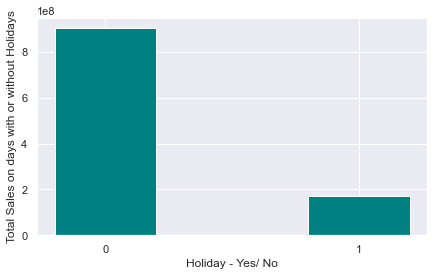

In [780]:

fig = plt.figure(figsize = (7, 4))
holiday_sales=train_df4.groupby(['holiday_type']).agg({'sales':'sum'}).reset_index(drop=False)

plt.bar(holiday_sales['holiday_type'], holiday_sales['sales'], color ='teal',
        width = 0.4)

plt.xlabel("Holiday - Yes/ No")
plt.ylabel("Total Sales on days with or without Holidays")
plt.show()

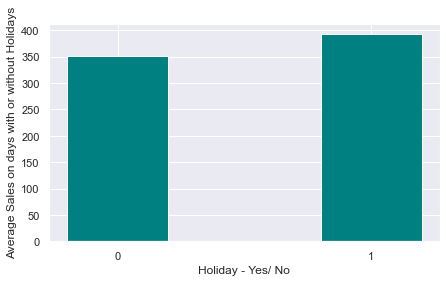

In [781]:
fig = plt.figure(figsize = (7, 4))
holiday_avgsales=train_df4.groupby(['holiday_type']).agg({'sales':'mean'}).reset_index(drop=False)

plt.bar(holiday_avgsales['holiday_type'], holiday_avgsales['sales'], color ='teal',
        width = 0.4)

plt.xlabel("Holiday - Yes/ No")
plt.ylabel("Average Sales on days with or without Holidays")
plt.show()

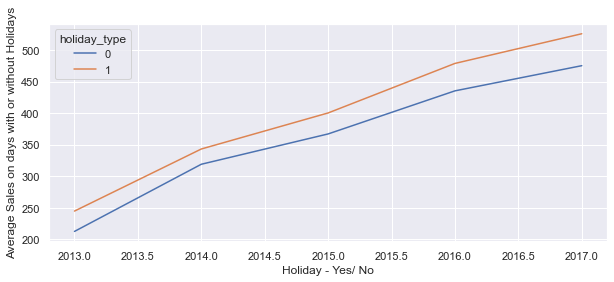

In [782]:
fig = plt.figure(figsize = (10, 4))
holiday_avgsales=train_df4.groupby(['Year','holiday_type']).agg({'sales':'mean'}).reset_index(drop=False)

#plt.plot(holiday_avgsales['holiday_type'], holiday_avgsales['sales'], hue='Year')
sns.lineplot(data=holiday_avgsales, x="Year", y="sales", hue='holiday_type', sort=True)
plt.xlabel("Holiday - Yes/ No")
plt.ylabel("Average Sales on days with or without Holidays")
plt.show()

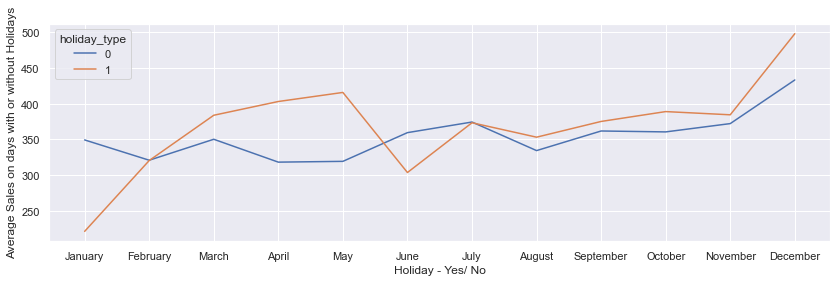

In [783]:
fig = plt.figure(figsize = (14, 4))
holiday_avgsalesmonth=train_df4.groupby(['Month','Month_Number','holiday_type']).agg({'sales':'mean'}).reset_index(drop=False).sort_values(by=['Month_Number'])
sns.lineplot(data=holiday_avgsalesmonth, x="Month", y="sales", hue='holiday_type', sort=True)
plt.xlabel("Holiday - Yes/ No")
plt.ylabel("Average Sales on days with or without Holidays")
plt.show()

In [784]:
# Ordinary Least Squares (OLS) model
model = ols('sales ~ holiday_type', data=train_df4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
holiday_type,6.132023e+08,1.0,505.027878,7.821313e-112
Residual,3.643661e+12,3000886.0,NaN,NaN


#### Hypothesis 4

H0: Weekend has no effect on sales   
H0: Weekend has an effect on sales  

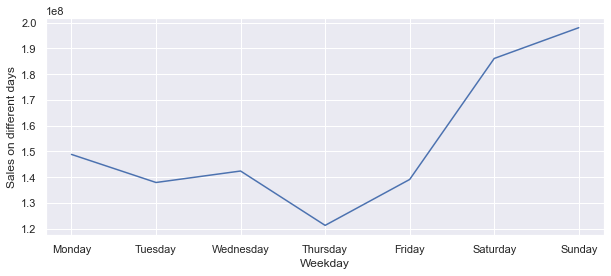

In [785]:
fig = plt.figure(figsize = (10, 4))
Weekday_sales=train_df4.groupby(['weekday','weekday_nbr']).agg({'sales':'sum','id':'count'}).reset_index(drop=False).sort_values(by='weekday_nbr')
Weekday_sales['Avg_sales']=Weekday_sales['sales']/Weekday_sales['id']

plt.plot(Weekday_sales['weekday'], Weekday_sales['sales'])
plt.xlabel('Weekday')
plt.ylabel("Sales on different days")
plt.show()

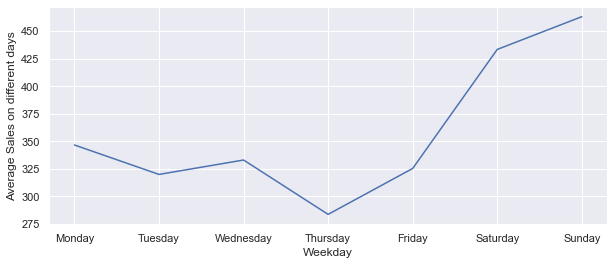

In [820]:
fig = plt.figure(figsize = (10, 4))
plt.plot(Weekday_sales['weekday'], Weekday_sales['Avg_sales'])
plt.xlabel('Weekday')
plt.ylabel("Average Sales on different days")
plt.show()

In [787]:
# Ordinary Least Squares (OLS) model
model = ols('sales ~ weekday', data=train_df4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
weekday,1.094443e+10,6.0,1506.558564,0.0
Residual,3.633330e+12,3000881.0,NaN,NaN


# Predicting overall  daily sales 

###  Sales Distribution across years for all the stores

In [788]:
regressor=train[['date','dcoilwtico','holiday_type','weekday']].drop_duplicates()
overall_dailysales=train.groupby(['date']).agg({'sales':'sum','onpromotion':'sum'}).reset_index(drop=False)
overall_transactions=transactions_df.groupby(['date']).agg({'transactions':'sum'}).reset_index(drop=False)
overall_dailysales=overall_dailysales.merge(regressor, on='date', how='left')
overall_dailysales=overall_dailysales.merge(overall_transactions, on='date', how='left')

In [789]:
regressor=test[['date','dcoilwtico','holiday_type','weekday']].drop_duplicates()
test_final=test.groupby(['date']).agg({'sales':'sum','onpromotion':'sum'}).reset_index(drop=False)
overall_transactions=transactions_df.groupby(['date']).agg({'transactions':'sum'}).reset_index(drop=False)
test_final=test_final.merge(regressor, on='date', how='left')
test_final=test_final.merge(overall_transactions, on='date', how='left')

In [790]:
datetime_series = pd.to_datetime(overall_dailysales['date'])
test_datetime_series = pd.to_datetime(test_final['date'])
# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)
test_datetime_index = pd.DatetimeIndex(test_datetime_series.values)
overall_dailysales=overall_dailysales.set_index(datetime_index)
test_final=test_final.set_index(test_datetime_index)

In [791]:
overall_dailysales['transactions'].fillna(0, inplace=True)
test_final['transactions'].fillna(0, inplace=True)
overall_dailysales.drop('date',axis=1,inplace=True)
test_final.drop('date',axis=1,inplace=True)

In [792]:
# Making the date column as the index of the dataset
sales_overall=train
sales_overall.set_index('date', inplace=True)

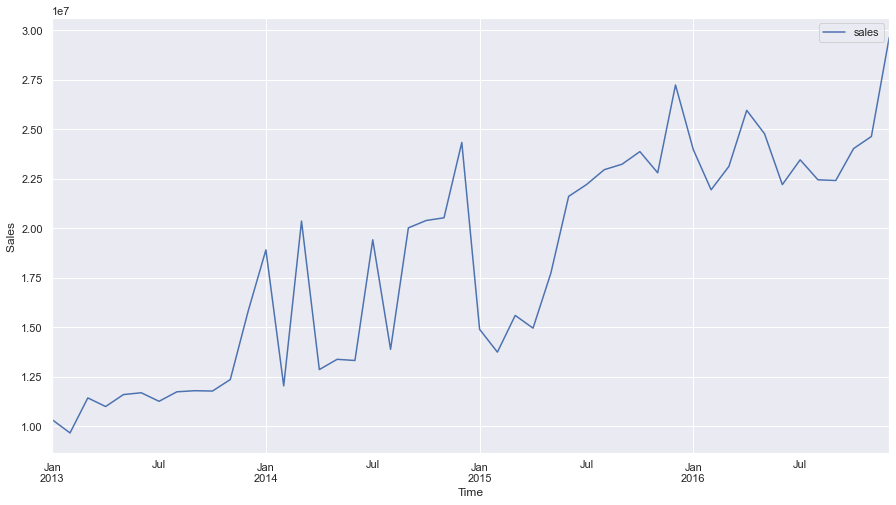

In [793]:
sales=sales_overall.groupby(['Monthly_Level']).agg({'sales':'sum'})
sales.plot()
plt.xlabel('Time')
plt.ylabel("Sales ")
plt.show()

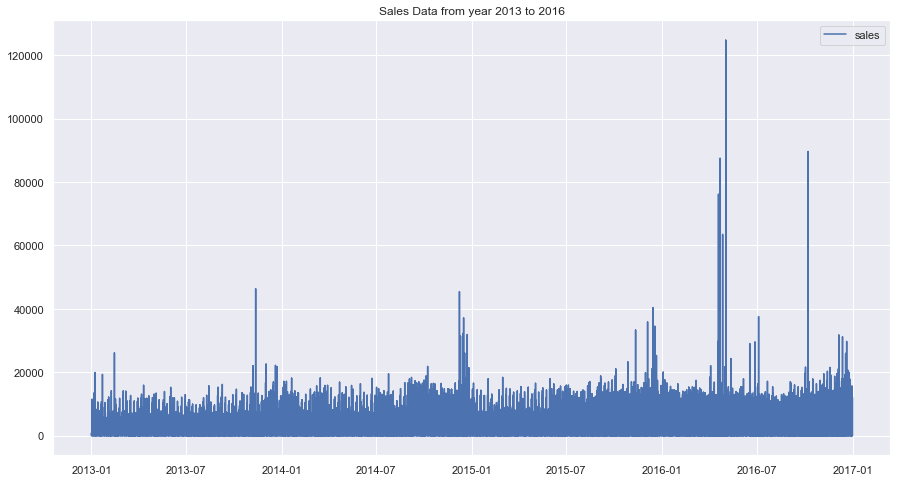

In [794]:
# Plot the data
plt.plot(sales_overall.index, sales_overall['sales'], label = "sales")
plt.legend(loc='best')
plt.title("Sales Data from year 2013 to 2016")
plt.show()


## Testing if Time Series is stationary

#### Hypothesis

Null Hypothesis (HO): Series is non-stationary or series has a unit root.  

Alternate Hypothesis(HA): Series is stationary or series has no unit root

Conditions to Reject Null Hypothesis(HO)  

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e.,time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [822]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(overall_dailysales.sales, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.009672040278186
2. P-Value :  0.2823484153973075
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1434
5. Critical Values :
	 1% :  -3.434918371231736
	 5% :  -2.8635576234668982
	 10% :  -2.5678441693558898


Observation: Since p_value>0.5 we can not reject the Null Hypothesis; time series is not stationary

In [823]:
from statsmodels.tsa.seasonal import seasonal_decompose
add_result = seasonal_decompose(overall_dailysales['sales'], model='additive',period=365)
# Multiplicative Decomposition 
mul_result = seasonal_decompose(overall_dailysales['sales'], model='multiplicative',period=1)

<Figure size 576x288 with 0 Axes>

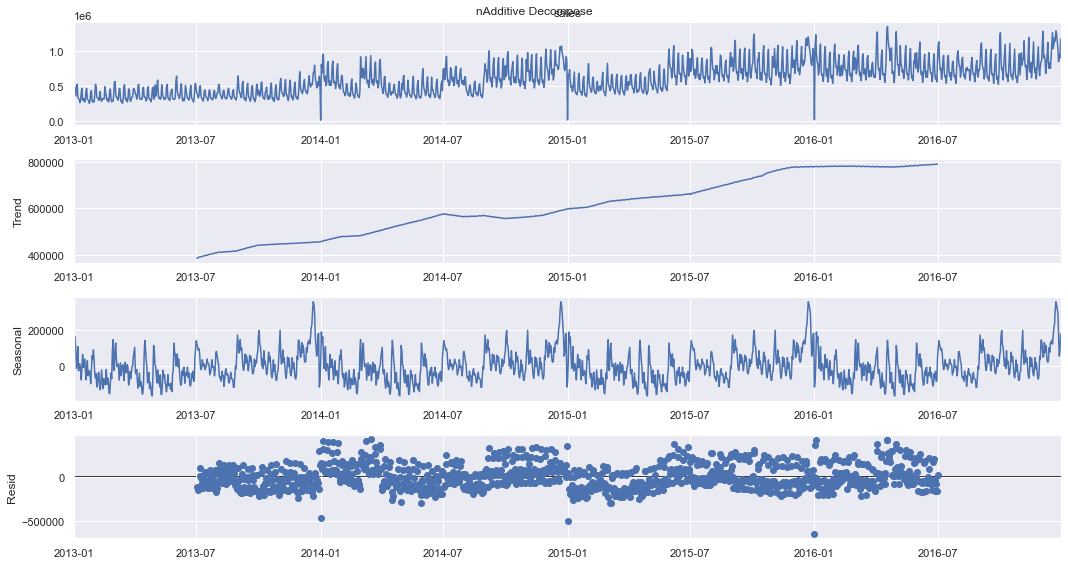

In [826]:
plt.figure(figsize = (8, 4))
add_result.plot().suptitle('nAdditive Decompose', fontsize=12)
plt.show()

In [798]:
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.tail()

,seasoanilty,trend,residual,actual_values
2016-12-27,166349.343421,NaN,NaN,8.424755e+05
2016-12-28,56181.447882,NaN,NaN,9.515337e+05
2016-12-29,77710.080207,NaN,NaN,8.941082e+05
2016-12-30,175571.804507,NaN,NaN,1.163643e+06
2016-12-31,180807.531453,NaN,NaN,1.109013e+06


#### Making the data stationary and finding value of d

In [828]:
overall_dailysales['sales_diff'] = overall_dailysales['sales'] - overall_dailysales['sales'].shift(1)
overall_dailysales['sales_diff'].fillna(0, inplace=True)
overall_dailysales[['sales','sales_diff']].head(5)

,sales,sales_diff
2013-01-01,2511.618999,0.000000
2013-01-02,496092.417944,493580.798945
2013-01-03,361461.231124,-134631.186820
2013-01-04,354459.677093,-7001.554031
2013-01-05,477350.121229,122890.444136


In [800]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(overall_dailysales['sales_diff'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -9.5770669845666
2. P-Value :  2.2088048426585958e-16
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1432
5. Critical Values :
	 1% :  -3.4349247631306237
	 5% :  -2.8635604442944658
	 10% :  -2.5678456715029183


As seen, after 1st level of differencing, our data is becoming stationary; hence d=1

## Forecasting with ARIMA Model

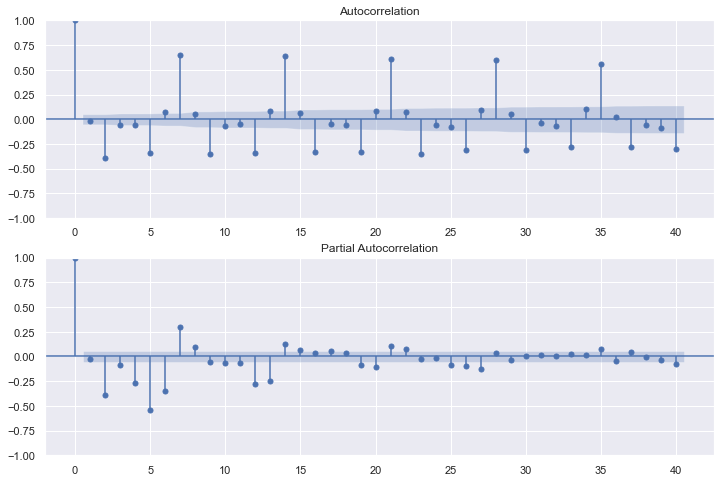

In [801]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(overall_dailysales['sales_diff'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(overall_dailysales['sales_diff'],lags=40,ax=ax2)

In [802]:
exog=overall_dailysales[['onpromotion','dcoilwtico','holiday_type','weekday','transactions','sales_diff']]

In [803]:
from statsmodels.tsa.arima.model import ARIMA
# 1,1,2 ARIMA Model
model = ARIMA(overall_dailysales['sales'],order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1457
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -19124.172
Date:                Sun, 07 Aug 2022   AIC                          38258.345
Time:                        17:29:38   BIC                          38284.762
Sample:                             0   HQIC                         38268.201
                               - 1457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3104      0.047      6.587      0.000       0.218       0.403
ar.L2         -0.2283      0.034     -6.628      0.000      -0.296      -0.161
ma.L1         -0.5909      0.048    -12.299      0.0

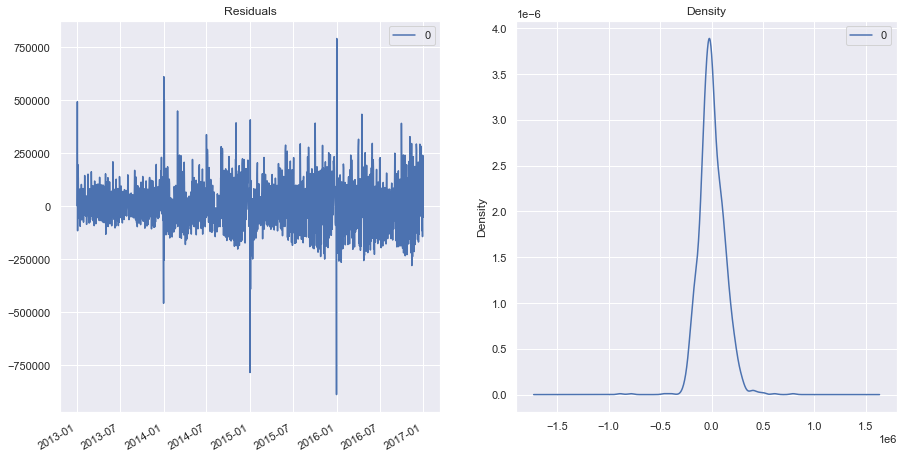

In [804]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<AxesSubplot:>

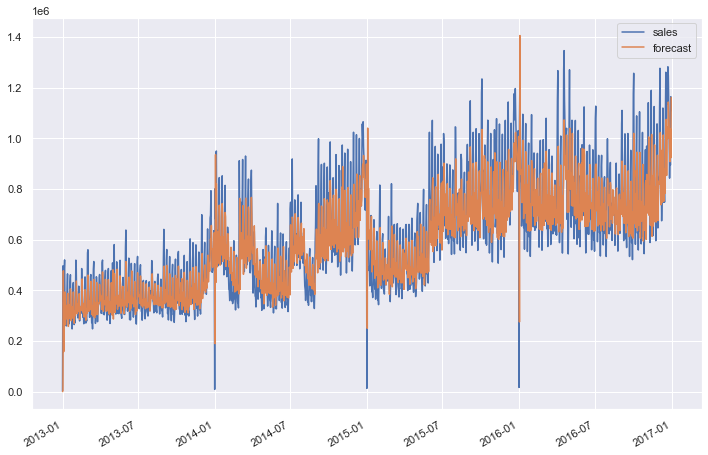

In [805]:
overall_dailysales_arima=overall_dailysales
overall_dailysales_arima['forecast']=model_fit.predict()
overall_dailysales_arima[['sales','forecast']].plot(figsize=(12,8))

In [806]:
overall_dailysales_arima[['sales','forecast']]

,sales,forecast
2013-01-01,2.511619e+03,0.000000e+00
2013-01-02,4.960924e+05,2.447143e+03
2013-01-03,3.614612e+05,4.767770e+05
2013-01-04,3.544597e+05,1.578492e+05
2013-01-05,4.773501e+05,3.189684e+05
...,...,...
2016-12-27,8.424755e+05,9.576738e+05
2016-12-28,9.515337e+05,9.074954e+05
2016-12-29,8.941082e+05,1.037073e+06
2016-12-30,1.163643e+06,9.227592e+05


In [807]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse ,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(overall_dailysales_arima['forecast'],overall_dailysales_arima['sales'])

{'mape': 0.2641178849057131,
 'me': -4426.742652704442,
 'mae': 90965.83439581658,
 'mpe': 0.13602430206612104,
 'rmse': 121791.6291369397,
 'corr': 0.8387254368706629,
 'minmax': 0.13453818302091303}

# Forecasting using Auto Arima

In [810]:
import pmdarima as pm
model_fit = pm.auto_arima(overall_dailysales['sales'], test='adf', 
                         max_p=3, max_d=3, max_q=3, 
                         seasonal=True, m=12,
                         max_P=3, max_D=2, max_Q=3,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=38391.738, Time=3.35 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=40028.849, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=38561.395, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=39150.765, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=43110.964, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=38405.041, Time=0.64 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=38393.145, Time=1.41 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=38430.924, Time=8.40 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=38489.634, Time=9.44 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=38450.225, Time=0.21 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=38402.440, Time=2.21 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=6.30 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=9.51 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=38573.735, Time=1.49 sec
 ARIMA(2,0,1)(1,0

<AxesSubplot:title={'center':'In Sample Sales Prediction'}>

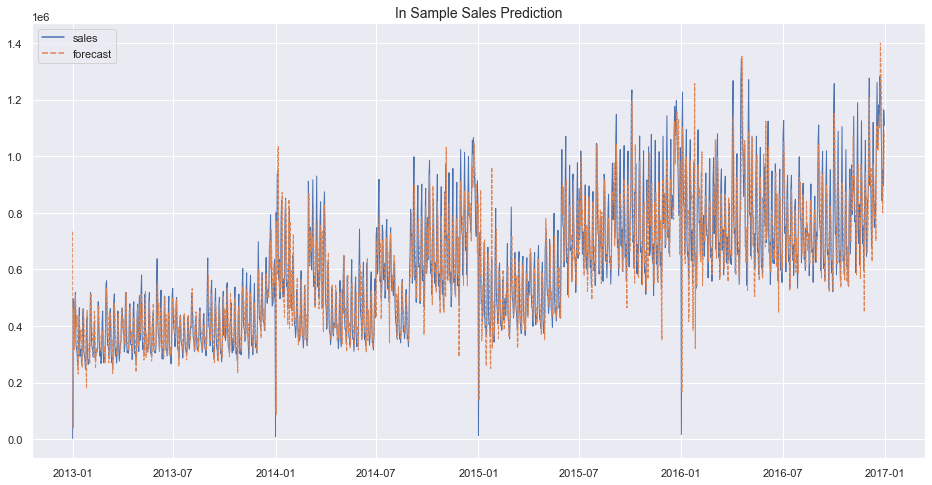

In [813]:
overall_dailysales_autoarima=overall_dailysales
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
overall_dailysales_autoarima['forecast'] = pred

# Calculate the percentage difference
overall_dailysales_autoarima['diff_percent'] = abs((overall_dailysales_autoarima['sales'] - overall_dailysales_autoarima['forecast']) / overall_dailysales_autoarima['sales'])* 100

# Print the predicted time-series
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("In Sample Sales Prediction", fontsize=14)
sns.lineplot(data=overall_dailysales_autoarima[['sales', 'forecast']], linewidth=1.0)


In [814]:
overall_dailysales_autoarima

,sales,onpromotion,dcoilwtico,holiday_type,weekday,transactions,sales_diff,forecast,diff_percent
2013-01-01,2.511619e+03,0,93.14,1,Tuesday,770.0,0.000000,7.332453e+05,29094.128076
2013-01-02,4.960924e+05,0,93.14,0,Wednesday,93215.0,493580.798945,3.978717e+04,91.979888
2013-01-03,3.614612e+05,0,92.97,0,Thursday,78504.0,-134631.186820,4.593572e+05,27.083387
2013-01-04,3.544597e+05,0,93.12,0,Friday,78494.0,-7001.554031,3.158998e+05,10.878508
2013-01-05,4.773501e+05,0,93.20,1,Saturday,93573.0,122890.444136,4.644350e+05,2.705581
...,...,...,...,...,...,...,...,...,...
2016-12-27,8.424755e+05,16147,52.82,0,Tuesday,95643.0,-190295.258780,9.263562e+05,9.956461
2016-12-28,9.515337e+05,23634,54.01,0,Wednesday,103717.0,109058.223730,7.991568e+05,16.013821
2016-12-29,8.941082e+05,15877,53.80,0,Thursday,102665.0,-57425.477013,9.051875e+05,1.239143
2016-12-30,1.163643e+06,21974,53.75,0,Friday,127771.0,269534.801157,9.149700e+05,21.370216
